./tifs_data/v2_style_loss_2017_dhnBLK/Sp/
./tifs_data/v2_can_2017_canBLK/Sp/
./tifs_data/v2_1e4_2017_dhnBLK/Sp/
./tifs_data/v2__2017_msdgfBLK/Sp/
./tifs_data/v2_da_2017_dhnBLK/Sp/
./tifs_data/splicingBLK/Sp/


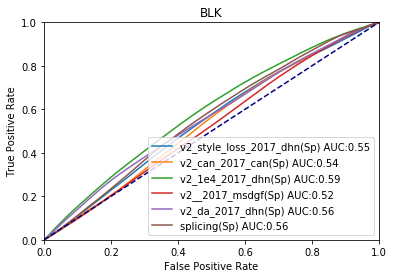

./tifs_data/v2_style_loss_2017_dhnNOI1/Sp/
./tifs_data/v2_can_2017_canNOI1/Sp/
./tifs_data/v2_1e4_2017_dhnNOI1/Sp/
./tifs_data/v2__2017_msdgfNOI1/Sp/
./tifs_data/v2_da_2017_dhnNOI1/Sp/
./tifs_data/splicingNOI1/Sp/


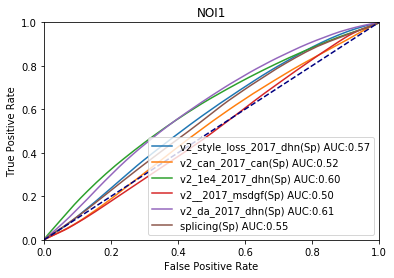

./tifs_data/v2_style_loss_2017_dhnCFA1/Sp/
./tifs_data/v2_can_2017_canCFA1/Sp/
./tifs_data/v2_1e4_2017_dhnCFA1/Sp/
./tifs_data/v2__2017_msdgfCFA1/Sp/
./tifs_data/v2_da_2017_dhnCFA1/Sp/
./tifs_data/splicingCFA1/Sp/


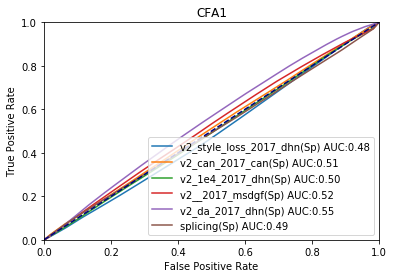

./tifs_data/v2_style_loss_2017_dhnCFA2/Sp/
./tifs_data/v2_can_2017_canCFA2/Sp/
./tifs_data/v2_1e4_2017_dhnCFA2/Sp/
./tifs_data/v2__2017_msdgfCFA2/Sp/
./tifs_data/v2_da_2017_dhnCFA2/Sp/
./tifs_data/splicingCFA2/Sp/


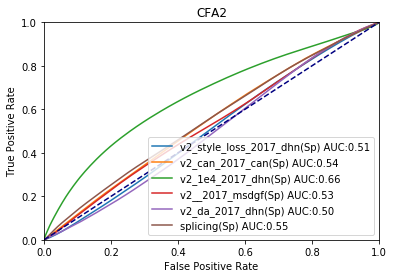

./tifs_data/v2_style_loss_2017_dhnDCT/Sp/
./tifs_data/v2_can_2017_canDCT/Sp/
./tifs_data/v2_1e4_2017_dhnDCT/Sp/
./tifs_data/v2__2017_msdgfDCT/Sp/
./tifs_data/v2_da_2017_dhnDCT/Sp/
./tifs_data/splicingDCT/Sp/


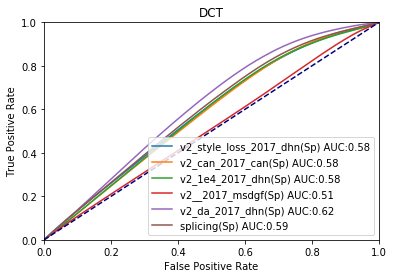

./tifs_data/v2_style_loss_2017_dhnCAGI/Sp/
./tifs_data/v2_can_2017_canCAGI/Sp/
./tifs_data/v2_1e4_2017_dhnCAGI/Sp/
./tifs_data/v2__2017_msdgfCAGI/Sp/
./tifs_data/v2_da_2017_dhnCAGI/Sp/
./tifs_data/splicingCAGI/Sp/


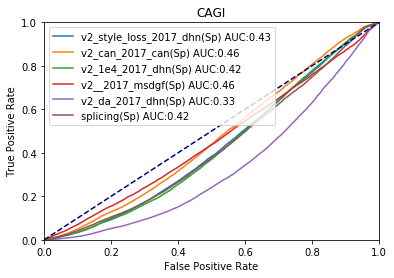

./tifs_data/v2_style_loss_2017_dhnNOI2/Sp/
./tifs_data/v2_can_2017_canNOI2/Sp/
./tifs_data/v2_1e4_2017_dhnNOI2/Sp/
./tifs_data/v2__2017_msdgfNOI2/Sp/
./tifs_data/v2_da_2017_dhnNOI2/Sp/
./tifs_data/splicingNOI2/Sp/


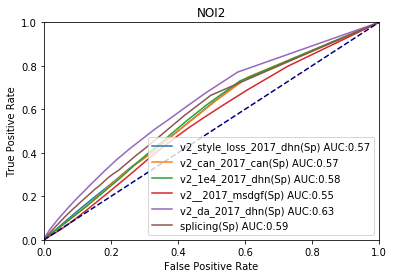

./tifs_data/v2_style_loss_2017_dhnNOI4/Sp/
./tifs_data/v2_can_2017_canNOI4/Sp/
./tifs_data/v2_1e4_2017_dhnNOI4/Sp/
./tifs_data/v2__2017_msdgfNOI4/Sp/
./tifs_data/v2_da_2017_dhnNOI4/Sp/
./tifs_data/splicingNOI4/Sp/


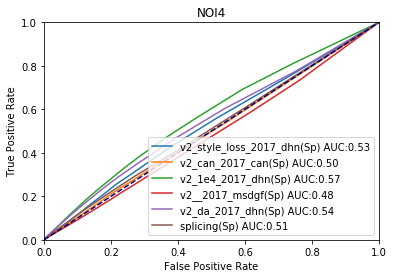

In [18]:
# load the features from mat.

import numpy as np
import h5py
from os import listdir
from os.path import isfile, join
from PIL import Image 
import matplotlib.pyplot as plt
from sklearn import metrics
# plt.switch_backend('agg')
%matplotlib inline

methods = ['v2_style_loss_2017_dhn','v2_can_2017_can','v2_1e4_2017_dhn','v2__2017_msdgf','v2_da_2017_dhn','splicing']
algos = ['BLK','NOI1','CFA1','CFA2','DCT','CAGI','NOI2','NOI4']
for algo in algos:
    plt.figure()
    for method in methods:
        for tp in ['Sp']:
            mypath = './tifs_data/%s%s/%s/'%(method,algo,tp)
            print(mypath)
            onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) ]
            y_predict = []
            y_reality = []
            for file in onlyfiles:
                with h5py.File(mypath+file,'r') as f: 
                    binMask = np.transpose(f['BinMask'])
                    results = np.transpose(f['Result'])
#                     plt.figure()
#                     plt.imshow(binMask)
#                     plt.figure()
#                     plt.imshow(results)
                   
                    results[np.isnan(results)] = 0
                    results[np.isinf(results)] = max(results[~np.isinf(results)])
                    results = (results-np.min(results))/np.ptp(results)
                    resultsImg = Image.fromarray(np.uint8(results*255))
                    resultsImg = resultsImg.resize(binMask.shape, Image.BICUBIC)
                    y_reality.append(binMask.flatten())
                    y_predict.append((np.array(resultsImg)/255.0).flatten())
            # combine the predict together
            y_true = np.concatenate(y_reality).astype(np.int)
            y_pred = np.concatenate(y_predict)
            fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
            plt.plot(fpr,tpr,label="%s(%s) AUC:%.2f"%(method,tp,metrics.auc(fpr,tpr)))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')    
    plt.legend(loc='best')
    plt.title(algo)
    plt.show();
            
                

In [9]:
512*512

262144